# Build a SeqData

In [14]:
# Imports
import os
import xarray as xr
import numpy as np
import seqdata as sd

In [3]:
# TODO: change to your path
data_dir = "/cellar/users/aklie/data/datasets/HepG2_U2AF2-eCLIP/data"

# Positive strand

In [6]:
# Set-up all file paths for positive strand
pos_peaks = os.path.join(data_dir, "peaks.crosslink.pos.bed")
pos_bw = [os.path.join(data_dir, "HepG2_U2AF2_eCLIP_plus_counts.bw"), os.path.join(data_dir, "HepG2_U2AF2_control_plus_counts.bw")]
pos_names = ['signal', 'control']
pos_out = os.path.join(data_dir, "pos.zarr")
fasta = os.path.join(data_dir, "hg38.fa")

In [7]:
# Build positive strand SeqData
pos_sdata = sd.from_region_files(
    sd.GenomeFASTA('seq',
        fasta,
        batch_size=2048,
        n_threads=4,
        alphabet="RNA"
    ),
    sd.BigWig(
        'cov',
        pos_bw,
        pos_names,
        batch_size=2048,
        n_jobs=4,
        threads_per_job=2,
    ),
    path=pos_out,
    fixed_length=300,
    bed=pos_peaks,
    overwrite=True,
    max_jitter=32
)
pos_sdata

100%|██████████| 223390/223390 [00:47<00:00, 4687.31it/s] 
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|██████████| 223390/223390 [00:49<00:00, 4469.08it/s]


<xarray.Dataset>
Dimensions:     (_sequence: 223390, cov_sample: 2, _length: 364)
Coordinates:
  * cov_sample  (cov_sample) object 'signal' 'control'
Dimensions without coordinates: _sequence, _length
Data variables:
    chrom       (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    cov         (_sequence, cov_sample, _length) float32 dask.array<chunksize=(2048, 1, 364), meta=np.ndarray>
    name        (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    score       (_sequence) float64 dask.array<chunksize=(55848,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    thickEnd    (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    thickStart  (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    32
    sequence_dim:  _sequence

In [10]:
# Split cov and control
pos_sdata['signal'] = (
    pos_sdata.cov.sel(cov_sample=['signal'])
    .drop_vars("cov_sample").squeeze()
)
pos_sdata['control'] = (
    pos_sdata.cov.sel(cov_sample=['control'])
    .drop_vars("cov_sample").squeeze()
)

# Get rid of aggregated cov
pos_sdata = pos_sdata.drop_vars("cov")
pos_sdata = pos_sdata.drop_vars("cov_sample")
pos_sdata

<xarray.Dataset>
Dimensions:     (_sequence: 223390, _length: 364)
Dimensions without coordinates: _sequence, _length
Data variables:
    chrom       (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    name        (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    score       (_sequence) float64 dask.array<chunksize=(55848,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    thickEnd    (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    thickStart  (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    signal      (_sequence, _length) float32 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    control     (_sequence, _length) float32 dask.array<chunksize=(2048, 364), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    32
    sequence_dim:  _sequence

# Negative strand

In [11]:
# Set-up all file paths for negative strand
neg_peaks = os.path.join(data_dir, "peaks.crosslink.neg.bed")
neg_bw = [os.path.join(data_dir, "HepG2_U2AF2_eCLIP_minus_counts.bw"), os.path.join(data_dir, "HepG2_U2AF2_control_minus_counts.bw")]
neg_names = ['signal', 'control']
neg_out = os.path.join(data_dir, "neg.zarr")

In [12]:
# Build negative strand SeqData
neg_sdata = sd.from_region_files(
    sd.GenomeFASTA(
        'seq',
        fasta,
        batch_size=2048,
        n_threads=4,
    ),
    sd.BigWig(
        'cov',
        neg_bw,
        neg_names,
        batch_size=2048,
        n_jobs=4,
        threads_per_job=2,
    ),
    path=neg_out,
    fixed_length=300,
    bed=neg_peaks,
    overwrite=True,
    max_jitter=32
)
neg_sdata

100%|██████████| 226135/226135 [00:51<00:00, 4411.42it/s]


<xarray.Dataset>
Dimensions:     (_sequence: 226135, cov_sample: 2, _length: 364)
Coordinates:
  * cov_sample  (cov_sample) object 'signal' 'control'
Dimensions without coordinates: _sequence, _length
Data variables:
    chrom       (_sequence) object dask.array<chunksize=(56534,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
    cov         (_sequence, cov_sample, _length) float32 dask.array<chunksize=(2048, 1, 364), meta=np.ndarray>
    name        (_sequence) object dask.array<chunksize=(56534,), meta=np.ndarray>
    score       (_sequence) float64 dask.array<chunksize=(56534,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(56534,), meta=np.ndarray>
    thickEnd    (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
    thickStart  (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    32
    sequence_dim:  _sequence

In [13]:
# Split cov and control
neg_sdata['signal'] = (
    neg_sdata.cov.sel(cov_sample=['signal'])
    .drop_vars("cov_sample").squeeze()
)
neg_sdata['control'] = (
    neg_sdata.cov.sel(cov_sample=['control'])
    .drop_vars("cov_sample").squeeze()
)
# Get rid of aggregated cov
neg_sdata = neg_sdata.drop_vars("cov")
neg_sdata = neg_sdata.drop_vars("cov_sample")
neg_sdata

<xarray.Dataset>
Dimensions:     (_sequence: 226135, _length: 364)
Dimensions without coordinates: _sequence, _length
Data variables:
    chrom       (_sequence) object dask.array<chunksize=(56534,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
    name        (_sequence) object dask.array<chunksize=(56534,), meta=np.ndarray>
    score       (_sequence) float64 dask.array<chunksize=(56534,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(56534,), meta=np.ndarray>
    thickEnd    (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
    thickStart  (_sequence) int64 dask.array<chunksize=(56534,), meta=np.ndarray>
    signal      (_sequence, _length) float32 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    control     (_sequence, _length) float32 dask.array<chunksize=(2048, 364), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    32
    sequence_dim:  _sequence

# Full SeqData

In [17]:
# Output path
out = os.path.join(data_dir, "HepG2_U2AF2_eCLIP.zarr")
out

'/cellar/users/aklie/data/datasets/HepG2_U2AF2-eCLIP/data/HepG2_U2AF2_eCLIP.zarr'

In [15]:
# Concatenate them
sdata = xr.concat([pos_sdata, neg_sdata], dim="_sequence")
sdata

<xarray.Dataset>
Dimensions:     (_sequence: 449525, _length: 364)
Dimensions without coordinates: _sequence, _length
Data variables:
    chrom       (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    name        (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    score       (_sequence) float64 dask.array<chunksize=(55848,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(55848,), meta=np.ndarray>
    thickEnd    (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    thickStart  (_sequence) int64 dask.array<chunksize=(55848,), meta=np.ndarray>
    signal      (_sequence, _length) float32 dask.array<chunksize=(2048, 364), meta=np.ndarray>
    control     (_sequence, _length) float32 dask.array<chunksize=(2048, 364), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    32
    sequence_dim:  _sequence


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [18]:
sd.to_zarr(sdata, out, mode="w")

/cellar/users/aklie/opt/miniconda3/envs/ml4gland/lib/python3.9/site-packages/xarray/core/dataset.py:764: UserWarning: reset_encoding is deprecated since 2023.11, use `drop_encoding` instead
  warnings.warn(
/cellar/users/aklie/projects/ML4GLand/SeqData/seqdata/xarray/seqdata.py:228: SerializationWarning: variable None has data in the form of a dask array with dtype=object, which means it is being loaded into memory to determine a data type that can be safely stored on disk. To avoid this, coerce this variable to a fixed-size dtype with astype() before saving it.
  sdata.to_zarr(


# Check by plotting

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def plot_tracks(tracks, interval, height=1.5, colors=None):
  _, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
  if not isinstance(axes, np.ndarray):
    axes = [axes]
  for ax, (title, y) in zip(axes, tracks.items()):
    if colors is not None:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y, color=colors[title])
    else:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y)
    ax.set_title(title)
    sns.despine(top=True, right=True, bottom=True)
  ax.set_xlabel(f"{interval['chrom']}:{interval['start']}-{interval['end']}")
  plt.tight_layout()

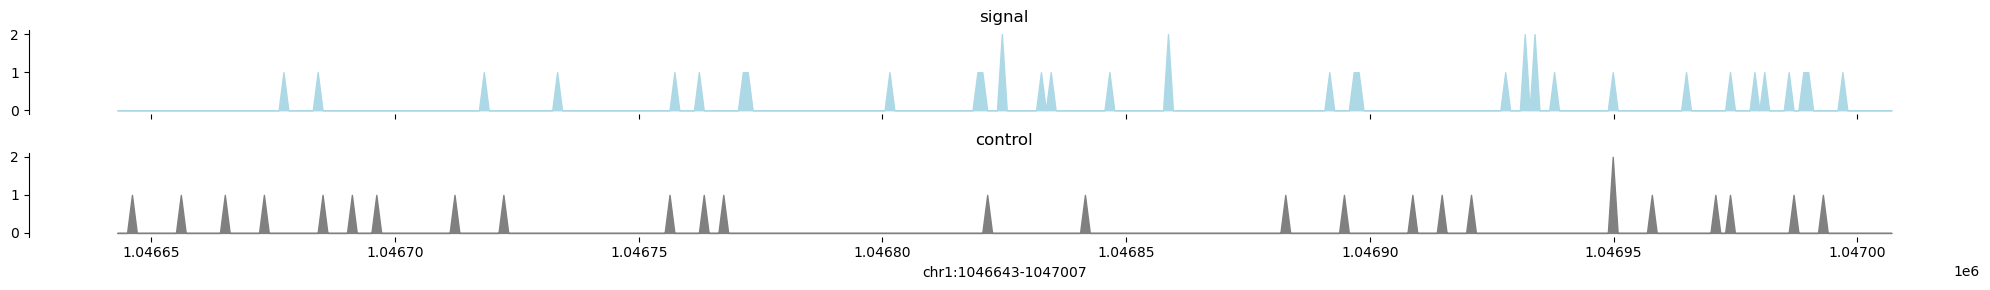

In [27]:
seq_num = 100
ser = sdata[["name", "chrom", "chromStart", "chromEnd"]].to_dataframe().loc[seq_num]
interval = {"chrom": ser["chrom"], "start": ser["chromStart"], "end": ser["chromEnd"]}
tracks = {
    "signal": sdata["signal"][seq_num].values.squeeze(),
    "control": sdata["control"][seq_num].values.squeeze()
}
colors = {
    "signal": "lightblue",
    "control": "grey"
}
plot_tracks(tracks, interval, colors=colors)

# DONE!

---